In [13]:
import pandas as pd
df_rep_train = pd.read_csv('./koi_light_curves_FATS2_metadata_train_model.csv') #raw 
df_rep_test = pd.read_csv('./koi_light_curves_FATS2_metadata_test_model.csv') #raw

#df_rep_train = pd.read_csv('../Datos/ICA_unb/koi_light_curves_FICA_train50_model.csv') 
#df_rep_test = pd.read_csv('../Datos/ICA_unb/koi_light_curves_FICA_test50_model.csv')

#df_rep_train = pd.read_csv('../Datos/PCA_unb/koi_light_curves_FPCA_train50_model.csv') 
#df_rep_test = pd.read_csv('../Datos/PCA_unb/koi_light_curves_FPCA_test50_model.csv')

#para fats2 
df_rep_train.fillna(df_rep_train.median(), inplace=True)
df_rep_test.fillna(df_rep_test.median(), inplace=True)
X_train = df_rep_train.values[:,:-1]
X_test = df_rep_test.values[:,:-1]

columns_names = df_rep_train.columns[:-2]

#all others
#X_train = df_rep_train.values
#X_test = df_rep_test.values

print(X_train.shape)

(4692, 42)


In [16]:
df_rep_train = df_rep_train[["KOI Name"] + list(columns_names)]
df_rep_test = df_rep_test[["KOI Name"] + list(columns_names)]

df_rep_train.head()

,KOI Name,Minimum,Maximum,Mean,Std,IQR,Skew,Kurtosis,Q1,Q2,...,Limb Darkening Coeff4,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count
0,NaN,-0.666930,0.113130,-0.007954,0.062159,0.006790,-6.642055,44.996410,-0.003710,0.00000,...,0.0,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1
1,K01009.01,-2.317060,2.014480,-0.000011,0.039241,0.000000,-14.200892,1926.289429,0.000000,0.00000,...,0.0,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1
2,K07621.01,-252.420898,67.621719,-0.530961,14.695308,0.887015,-7.884773,73.067699,-0.617055,-0.20146,...,0.0,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1
3,K06252.01,-0.325060,0.105750,-0.003040,0.022971,0.002130,-6.527795,48.724332,-0.001540,-0.00052,...,0.0,6341.0,3.301,-0.10,5.302,2.050,4.847,9.076,57.6,1
4,NaN,-131.644455,18.242790,-0.084548,3.145496,0.002915,-32.048374,1091.891638,-0.002285,0.00000,...,0.0,6018.0,4.327,0.18,1.212,1.142,341.666,806.993,704.5,1


In [18]:
df_rep_train.to_csv("koi_lightcurves_metadata_train.csv",index=False)
df_rep_test.to_csv("koi_lightcurves_metadata_test.csv",index=False)

In [24]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 393s 2us/step


In [37]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  

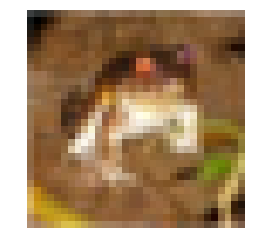

In [28]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

In [29]:
y_train

array([[6],
       [9],
       [9],
       ..., 
       [9],
       [1],
       [1]], dtype=uint8)

airplane


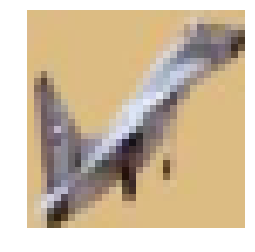

automobile


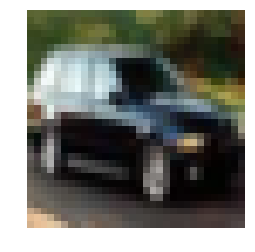

bird


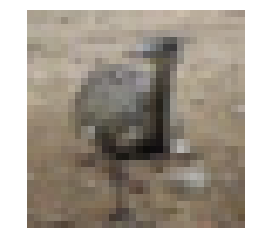

cat


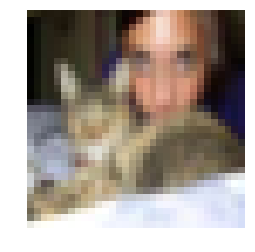

deer


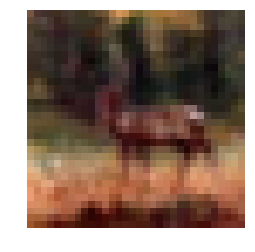

dog


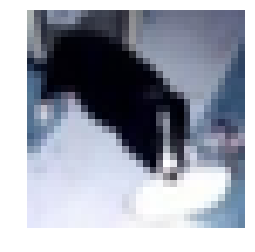

frog


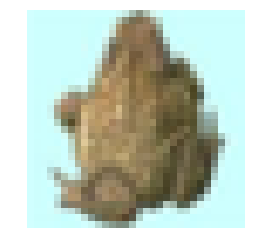

horse


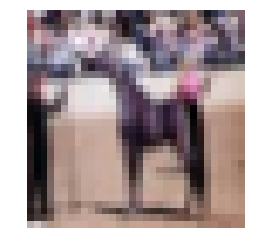

ship


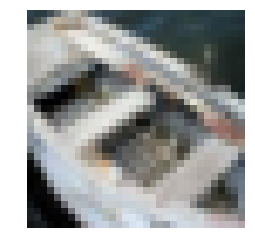

truck


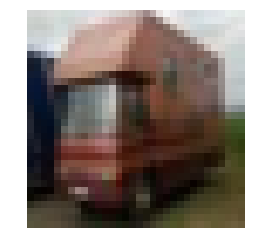

In [51]:
import numpy as np
idx_dato = [np.random.choice(np.where(y_train==i)[0]) for i in range(10)] #sample from each class
for k in dato:
    print(label_names[y_train[k,0]])
    plt.imshow(x_train[k])
    plt.axis('off')
    plt.show()

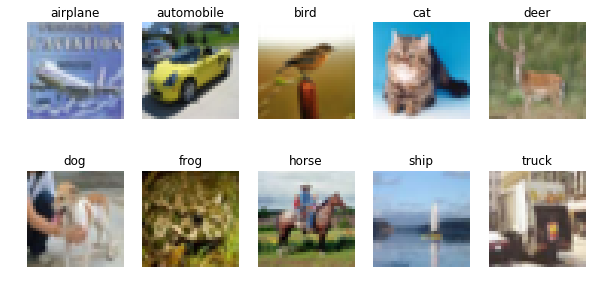

In [69]:
idx_dato = [np.random.choice(np.where(y_train==i)[0]) for i in range(10)] #sample from each class

f,axx = plt.subplots(2,5,figsize=(10,5))
for i, dato in enumerate(idx_dato):
    axx[int(i/5),i%5].imshow(x_train[dato])
    axx[int(i/5),i%5].axis('off')
    axx[int(i/5),i%5].set_title(label_names[i])
plt.show()

In [79]:
all_X = pd.concat([df_rep_train,df_rep_test])
all_X["KOI Name"] = pd.concat([df_labels_train["KOI Name"], df_labels_test["KOI Name"]]).values
all_X

,KOI Name,Minimum,Maximum,Mean,Std,IQR,Skew,Kurtosis,Q1,Q2,...,Limb Darkening Coeff4,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count
0,K01009.01,-0.666930,0.113130,-0.007954,0.062159,0.006790,-6.642055,44.996410,-0.003710,0.00000,...,0.0,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1
1,K07621.01,-2.317060,2.014480,-0.000011,0.039241,0.000000,-14.200892,1926.289429,0.000000,0.00000,...,0.0,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1
2,K06252.01,-252.420898,67.621719,-0.530961,14.695308,0.887015,-7.884773,73.067699,-0.617055,-0.20146,...,0.0,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1
3,K04162.01,-0.325060,0.105750,-0.003040,0.022971,0.002130,-6.527795,48.724332,-0.001540,-0.00052,...,0.0,6341.0,3.301,-0.10,5.302,2.050,4.847,9.076,57.6,1
4,K00998.01,-131.644455,18.242790,-0.084548,3.145496,0.002915,-32.048374,1091.891638,-0.002285,0.00000,...,0.0,6018.0,4.327,0.18,1.212,1.142,341.666,806.993,704.5,1
5,K00992.01,-0.975710,0.138010,-0.012519,0.097207,0.013990,-6.406975,42.283148,-0.009910,-0.00428,...,0.0,5782.0,4.280,0.16,1.220,1.035,4.530,22.901,26.2,2
6,K00982.01,-0.665920,0.154610,-0.017107,0.116127,0.033300,-2.856998,7.703530,-0.000270,0.01510,...,0.0,4506.0,4.626,-0.20,0.651,0.654,4.184,25.793,66.9,1
7,K03924.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.00000,...,0.0,6574.0,4.061,-0.22,1.768,1.317,532.246,3630.369,1207.6,1
8,K07623.01,-0.666620,0.957230,-0.002174,0.057638,0.000000,-0.271819,48.743398,0.000000,0.00000,...,0.0,4996.0,2.354,0.07,20.848,3.584,4.730,13.497,10.5,1
9,K00362.01,-98.050484,38.490341,-0.671133,9.584089,0.603105,-5.350996,39.552485,-0.573310,-0.17539,...,0.0,6061.0,4.401,-0.14,1.050,1.012,344.358,2487.494,2707.7,1


In [80]:
all_X.shape

(6257, 42)

In [94]:
#sort like mask
aux = df_sets.merge(all_X, on="KOI Name", how='left')
aux.drop(["Set"],axis=1,inplace=True)
aux.head()

,KOI Name,Minimum,Maximum,Mean,Std,IQR,Skew,Kurtosis,Q1,Q2,...,Limb Darkening Coeff4,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count
0,K00889.01,-41.834579,12.257070,-0.031439,1.865281,0.063255,-10.828006,138.118064,-0.036430,-0.00861,...,0.0,5332.0,4.500,-0.08,0.843,0.821,61.291,474.021,388.2,1.0
1,K01009.01,-0.666930,0.113130,-0.007954,0.062159,0.006790,-6.642055,44.996410,-0.003710,0.00000,...,0.0,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1.0
2,K07621.01,-2.317060,2.014480,-0.000011,0.039241,0.000000,-14.200892,1926.289429,0.000000,0.00000,...,0.0,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1.0
3,K06252.01,-252.420898,67.621719,-0.530961,14.695308,0.887015,-7.884773,73.067699,-0.617055,-0.20146,...,0.0,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1.0
4,K00958.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
aux.to_csv("koi_light_curves_X.csv",index=False)

In [86]:
#pandas.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None
pd.concat([df_sets,all_X],join='outer',join_axes=1)

TypeError: object of type 'int' has no len()

In [76]:
df_labels_test["KOI Name"]

0       K00889.01
7       K07622.01
16      K04924.01
34      K01002.01
44      K03351.01
45      K02534.01
50      K04929.01
53      K02178.01
55      K06093.01
57      K01987.01
58      K07627.01
69      K04934.01
70      K03735.01
93      K07631.01
97      K01020.01
105     K03598.01
106     K04939.01
109     K02671.01
114     K06271.01
115     K00363.01
116     K00440.01
118     K04941.01
119     K03699.01
120     K01003.01
123     K06272.01
129     K01000.01
137     K01023.01
138     K00053.01
139     K00379.01
144     K00378.01
          ...    
7895    K02088.01
7914    K00153.02
7922    K02372.01
7924    K02264.01
7927    K04148.01
7929    K05963.01
7946    K07521.02
7948    K00279.01
7949    K00279.02
7954    K07522.01
7956    K07523.01
7960    K07527.01
7962    K01474.01
7972    K01478.01
7974    K00788.01
7976    K00361.01
7988    K01516.01
7991    K08079.01
7994    K02463.01
8002    K06251.01
8003    K07536.01
8011    K07538.01
8014    K00215.01
8015    K04264.01
8016    K0

### LEctura para enunciado
---

In [1]:
import pandas  as pd
df_sets = pd.read_csv("./koi_sets_unb.csv") #new test set
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
#fijo para todos los datos

In [2]:
df_labels = pd.read_csv("./koi_labels.csv")
df_X = pd.read_csv("./koi_light_curves_X.csv")
df_labels_train = df_labels[mask_train]
df_labels_test = df_labels[mask_test]
df_X_train = df_X[mask_train]
df_X_test = df_X[mask_test]

y_train = ((df_labels_train["NExScI Disposition"]=="CONFIRMED")*1).values
y_test = ((df_labels_test["NExScI Disposition"]=="CONFIRMED")*1).values

In [3]:
df_X_train = df_X_train.reset_index(drop=True)
df_X_test = df_X_test.reset_index(drop=True)
df_X_train.fillna(df_X_train.median(), inplace=True) #rellenar valores nulos
df_X_test.fillna(df_X_test.median(), inplace=True)
X_train = df_X_train.values[:,1:]
X_test = df_X_test.values[:,1:]

columns_names = df_X_train.columns[1:]

print(X_train.shape)
print(X_test.shape)

(4692, 41)
(1565, 41)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
#X_val_scaled = ...
X_test_scaled =  scaler.transform(X_test)

/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
#red normal??
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) 
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy')
history = model.fit(X_train_scaled, y_train, epochs=100, verbose=1, validation_data=(X_test_scaled, y_test))

Using TensorFlow backend.


Train on 4692 samples, validate on 1565 samples
Epoch 1/100
4692/4692 [==============================] - 0s 91us/step - loss: 0.6605 - val_loss: 0.6370
Epoch 2/100
4692/4692 [==============================] - 0s 45us/step - loss: 0.6463 - val_loss: 0.6224
Epoch 3/100
4692/4692 [==============================] - 0s 42us/step - loss: 0.6321 - val_loss: 0.6143
Epoch 4/100
4692/4692 [==============================] - 0s 36us/step - loss: 0.6145 - val_loss: 0.6047
Epoch 5/100
4692/4692 [==============================] - 0s 42us/step - loss: 0.5942 - val_loss: 0.6056
Epoch 6/100
4692/4692 [==============================] - 0s 44us/step - loss: 0.5702 - val_loss: 0.5827
Epoch 7/100
4692/4692 [==============================] - 0s 42us/step - loss: 0.5450 - val_loss: 0.5772
Epoch 8/100
4692/4692 [==============================] - 0s 47us/step - loss: 0.5182 - val_loss: 0.5479
Epoch 9/100
4692/4692 [==============================] - 0s 41us/step - loss: 0.4926 - val_loss: 0.5301
Epoch 10/100
469

4692/4692 [==============================] - 0s 45us/step - loss: 0.2675 - val_loss: 0.3622
Epoch 79/100
4692/4692 [==============================] - 0s 43us/step - loss: 0.2673 - val_loss: 0.3641
Epoch 80/100
4692/4692 [==============================] - 0s 34us/step - loss: 0.2669 - val_loss: 0.3753
Epoch 81/100
4692/4692 [==============================] - 0s 40us/step - loss: 0.2665 - val_loss: 0.3565
Epoch 82/100
4692/4692 [==============================] - 0s 35us/step - loss: 0.2662 - val_loss: 0.3477
Epoch 83/100
4692/4692 [==============================] - 0s 41us/step - loss: 0.2659 - val_loss: 0.3539
Epoch 84/100
4692/4692 [==============================] - 0s 39us/step - loss: 0.2657 - val_loss: 0.3604
Epoch 85/100
4692/4692 [==============================] - 0s 35us/step - loss: 0.2655 - val_loss: 0.3549
Epoch 86/100
4692/4692 [==============================] - 0s 39us/step - loss: 0.2650 - val_loss: 0.3433
Epoch 87/100
4692/4692 [==============================] - 0s 54us/st

In [14]:
sgd = SGD(lr=0.01,momentum=0.9,nesterov=False)
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) 
model.compile(optimizer=sgd,loss='binary_crossentropy')
history = model.fit(X_train_scaled, y_train, epochs=100, verbose=1, validation_data=(X_test_scaled, y_test))

Train on 4692 samples, validate on 1565 samples
Epoch 1/100
4692/4692 [==============================] - 0s 83us/step - loss: 0.6048 - val_loss: 0.5523
Epoch 2/100
4692/4692 [==============================] - 0s 44us/step - loss: 0.4042 - val_loss: 0.4199
Epoch 3/100
4692/4692 [==============================] - 0s 45us/step - loss: 0.3203 - val_loss: 0.4346
Epoch 4/100
4692/4692 [==============================] - 0s 47us/step - loss: 0.2989 - val_loss: 0.3769
Epoch 5/100
4692/4692 [==============================] - 0s 42us/step - loss: 0.2891 - val_loss: 0.3675
Epoch 6/100
4692/4692 [==============================] - 0s 43us/step - loss: 0.2803 - val_loss: 0.4313
Epoch 7/100
4692/4692 [==============================] - 0s 47us/step - loss: 0.2780 - val_loss: 0.3914
Epoch 8/100
4692/4692 [==============================] - 0s 45us/step - loss: 0.2704 - val_loss: 0.3494
Epoch 9/100
4692/4692 [==============================] - 0s 50us/step - loss: 0.2671 - val_loss: 0.3427
Epoch 10/100
469

4692/4692 [==============================] - 0s 58us/step - loss: 0.2381 - val_loss: 0.3302
Epoch 79/100
4692/4692 [==============================] - 0s 42us/step - loss: 0.2429 - val_loss: 0.3239
Epoch 80/100
4692/4692 [==============================] - 0s 41us/step - loss: 0.2379 - val_loss: 0.3025
Epoch 81/100
4692/4692 [==============================] - 0s 34us/step - loss: 0.2390 - val_loss: 0.3213
Epoch 82/100
4692/4692 [==============================] - 0s 40us/step - loss: 0.2380 - val_loss: 0.3158
Epoch 83/100
4692/4692 [==============================] - 0s 36us/step - loss: 0.2411 - val_loss: 0.3140
Epoch 84/100
4692/4692 [==============================] - 0s 37us/step - loss: 0.2359 - val_loss: 0.3780
Epoch 85/100
4692/4692 [==============================] - 0s 39us/step - loss: 0.2395 - val_loss: 0.3335
Epoch 86/100
4692/4692 [==============================] - 0s 53us/step - loss: 0.2378 - val_loss: 0.3725
Epoch 87/100
4692/4692 [==============================] - 0s 36us/st

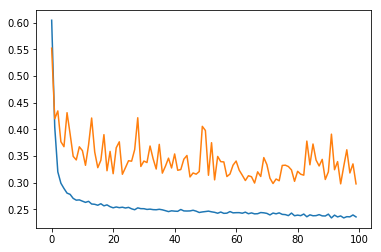

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [9]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict_classes(X_test_scaled),average='weighted')

0.8659849276078353

In [10]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) 
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy')
history = model.fit(X_train_scaled, y_train, epochs=100, verbose=1, validation_data=(X_test_scaled, y_test))

Train on 4692 samples, validate on 1565 samples
Epoch 1/100
4692/4692 [==============================] - 0s 65us/step - loss: 0.6301 - val_loss: 0.6192
Epoch 2/100
4692/4692 [==============================] - 0s 42us/step - loss: 0.5509 - val_loss: 0.5712
Epoch 3/100
4692/4692 [==============================] - 0s 45us/step - loss: 0.4888 - val_loss: 0.5274
Epoch 4/100
4692/4692 [==============================] - 0s 44us/step - loss: 0.4347 - val_loss: 0.4897
Epoch 5/100
4692/4692 [==============================] - 0s 73us/step - loss: 0.3905 - val_loss: 0.4584
Epoch 6/100
4692/4692 [==============================] - 0s 68us/step - loss: 0.3574 - val_loss: 0.4337
Epoch 7/100
4692/4692 [==============================] - 0s 41us/step - loss: 0.3332 - val_loss: 0.4148
Epoch 8/100
4692/4692 [==============================] - 0s 40us/step - loss: 0.3156 - val_loss: 0.4008
Epoch 9/100
4692/4692 [==============================] - 0s 42us/step - loss: 0.3027 - val_loss: 0.3902
Epoch 10/100
469

4692/4692 [==============================] - 0s 41us/step - loss: 0.2229 - val_loss: 0.3150
Epoch 79/100
4692/4692 [==============================] - 0s 40us/step - loss: 0.2226 - val_loss: 0.3171
Epoch 80/100
4692/4692 [==============================] - 0s 43us/step - loss: 0.2223 - val_loss: 0.3182
Epoch 81/100
4692/4692 [==============================] - 0s 36us/step - loss: 0.2219 - val_loss: 0.3154
Epoch 82/100
4692/4692 [==============================] - 0s 39us/step - loss: 0.2216 - val_loss: 0.3163
Epoch 83/100
4692/4692 [==============================] - 0s 40us/step - loss: 0.2212 - val_loss: 0.3161
Epoch 84/100
4692/4692 [==============================] - 0s 40us/step - loss: 0.2209 - val_loss: 0.3157
Epoch 85/100
4692/4692 [==============================] - 0s 41us/step - loss: 0.2206 - val_loss: 0.3147
Epoch 86/100
4692/4692 [==============================] - 0s 50us/step - loss: 0.2201 - val_loss: 0.3117
Epoch 87/100
4692/4692 [==============================] - 0s 68us/st

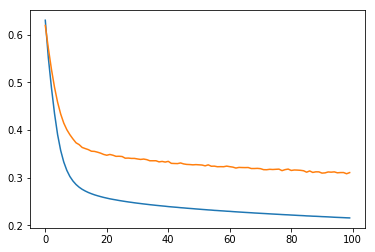

In [11]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [12]:
f1_score(y_test,model.predict_classes(X_test_scaled),average='weighted')

0.8642173968471959

In [19]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(256, kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(256, kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(256, kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(256, kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(256, kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) 
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy')
history = model.fit(X_train_scaled, y_train, epochs=50, verbose=1, validation_data=(X_test_scaled, y_test))

Train on 4692 samples, validate on 1565 samples
Epoch 1/50
4692/4692 [==============================] - 1s 187us/step - loss: 0.6649 - val_loss: 0.6411
Epoch 2/50
4692/4692 [==============================] - 1s 122us/step - loss: 0.6653 - val_loss: 0.6337
Epoch 3/50
4692/4692 [==============================] - 1s 127us/step - loss: 0.6654 - val_loss: 0.6302
Epoch 4/50
4692/4692 [==============================] - 1s 130us/step - loss: 0.6642 - val_loss: 0.6391
Epoch 5/50
4692/4692 [==============================] - 1s 136us/step - loss: 0.6653 - val_loss: 0.6439
Epoch 6/50
4692/4692 [==============================] - 1s 127us/step - loss: 0.6649 - val_loss: 0.6366
Epoch 7/50
4692/4692 [==============================] - 1s 138us/step - loss: 0.6647 - val_loss: 0.6400
Epoch 8/50
4692/4692 [==============================] - 1s 136us/step - loss: 0.6649 - val_loss: 0.6322
Epoch 9/50
4692/4692 [==============================] - 1s 136us/step - loss: 0.6656 - val_loss: 0.6296
Epoch 10/50
4692

In [41]:
f1_score(y_test,model.predict_classes(X_test_scaled))

/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [8]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation="relu"))
model.add(Dense(256, kernel_initializer='he_uniform',activation="relu"))
model.add(Dense(256, kernel_initializer='he_uniform',activation="relu"))
model.add(Dense(256, kernel_initializer='he_uniform',activation="relu"))
model.add(Dense(256, kernel_initializer='he_uniform',activation="relu"))
model.add(Dense(256, kernel_initializer='he_uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='he_uniform',activation="sigmoid")) 
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy')
history = model.fit(X_train_scaled, y_train, epochs=50, verbose=1, validation_data=(X_test_scaled, y_test))

Train on 4692 samples, validate on 1565 samples
Epoch 1/50
4692/4692 [==============================] - 1s 165us/step - loss: 0.3546 - val_loss: 0.3578
Epoch 2/50
4692/4692 [==============================] - 1s 117us/step - loss: 0.2693 - val_loss: 0.3472
Epoch 3/50
4692/4692 [==============================] - 1s 117us/step - loss: 0.2476 - val_loss: 0.3312
Epoch 4/50
4692/4692 [==============================] - 1s 118us/step - loss: 0.2325 - val_loss: 0.3040
Epoch 5/50
4692/4692 [==============================] - 1s 132us/step - loss: 0.2223 - val_loss: 0.3581
Epoch 6/50
4692/4692 [==============================] - 1s 128us/step - loss: 0.2114 - val_loss: 0.3189
Epoch 7/50
4692/4692 [==============================] - 1s 126us/step - loss: 0.2073 - val_loss: 0.3269
Epoch 8/50
4692/4692 [==============================] - 1s 123us/step - loss: 0.1999 - val_loss: 0.2893
Epoch 9/50
4692/4692 [==============================] - 1s 125us/step - loss: 0.1907 - val_loss: 0.2908
Epoch 10/50
4692

In [12]:
256*5

1280

In [22]:
model = Sequential()
model.add(Dense(1280, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy')
model.fit(X_train_scaled, y_train, epochs=50, verbose=1, validation_data=(X_test_scaled, y_test))

Train on 4692 samples, validate on 1565 samples
Epoch 1/50
4692/4692 [==============================] - 0s 97us/step - loss: 0.6333 - val_loss: 0.5989
Epoch 2/50
4692/4692 [==============================] - 0s 46us/step - loss: 0.5897 - val_loss: 0.5828
Epoch 3/50
4692/4692 [==============================] - 0s 47us/step - loss: 0.5478 - val_loss: 0.5478
Epoch 4/50
4692/4692 [==============================] - 0s 48us/step - loss: 0.5122 - val_loss: 0.5780
Epoch 5/50
4692/4692 [==============================] - 0s 45us/step - loss: 0.4789 - val_loss: 0.5173
Epoch 6/50
4692/4692 [==============================] - 0s 46us/step - loss: 0.4528 - val_loss: 0.4870
Epoch 7/50
4692/4692 [==============================] - 0s 63us/step - loss: 0.4328 - val_loss: 0.5098
Epoch 8/50
4692/4692 [==============================] - 0s 52us/step - loss: 0.4109 - val_loss: 0.4637
Epoch 9/50
4692/4692 [==============================] - 0s 46us/step - loss: 0.3949 - val_loss: 0.4443
Epoch 10/50
4692/4692 [==

In [23]:
1280/5

256.0

In [21]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict_classes(X_test_scaled))

0.77268292682926831